# Available datasets
The 10x visium datasets are already donwloaded and available in `/storage/groups/ml01/datasets/raw`

In detail, there are the following datasets (`dataset_name` in `dataset_folder`)
- `V1_Adult_Mouse_Brain` in `20191205_10XVisium_MouseBrainCoronal_giovanni.palla`
- `V1_Human_Heart` in `20191218_10XVisium_HumanHeart_giovanni.palla`
- ... TODO complete this list


## Load data
- scanpy already contains a loading function which reads the gene expression and downscaled png tissue images in an adata object
- the fullresolution tiff image has to be loaded externally

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import os
import imageio

# path to "raw" dataset folder
BASE_PATH = '../../data' # /storage/groups/ml01/datasets/raw

In [2]:
dataset_name = 'V1_Adult_Mouse_Brain'
dataset_folder = os.path.join(BASE_PATH, '20191205_10XVisium_MouseBrainCoronal_giovanni.palla')

load the data and calculate some basic metrics

In [3]:
adata = sc.read_visium(dataset_folder, count_file='{}_filtered_feature_bc_matrix.h5'.format(dataset_name))
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata.uns['spatial'][dataset_name]

{'images': {'hires': array([[[0.50980395, 0.52156866, 0.49411765],
          [0.50980395, 0.5176471 , 0.49411765],
          [0.50980395, 0.5176471 , 0.5019608 ],
          ...,
          [0.5019608 , 0.5137255 , 0.49019608],
          [0.5019608 , 0.5137255 , 0.49803922],
          [0.5019608 , 0.50980395, 0.49411765]],
  
         [[0.50980395, 0.5176471 , 0.49803922],
          [0.5137255 , 0.52156866, 0.49411765],
          [0.50980395, 0.5176471 , 0.49803922],
          ...,
          [0.49803922, 0.5137255 , 0.4862745 ],
          [0.49803922, 0.50980395, 0.49411765],
          [0.5019608 , 0.5137255 , 0.5019608 ]],
  
         [[0.5058824 , 0.5176471 , 0.49019608],
          [0.5137255 , 0.52156866, 0.5019608 ],
          [0.5058824 , 0.52156866, 0.5019608 ],
          ...,
          [0.5019608 , 0.5137255 , 0.49803922],
          [0.5019608 , 0.50980395, 0.49411765],
          [0.5058824 , 0.5137255 , 0.49803922]],
  
         ...,
  
         [[0.5137255 , 0.52156866, 0.501960

load the tiff image

In [5]:
img = imageio.imread(os.path.join(dataset_folder, '{}_image.tif'.format(dataset_name)))

## Visualize data
lets plot some information of the downscaled png tissue images

/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


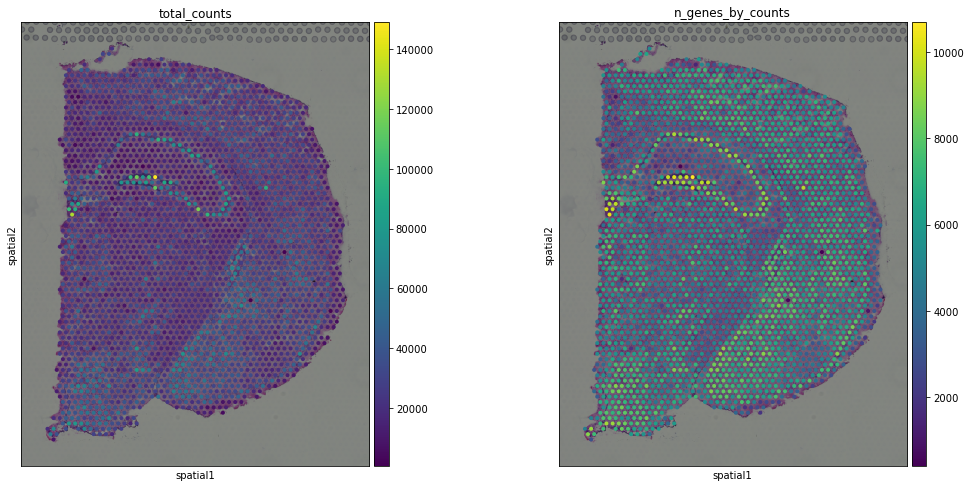

In [6]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

and now the fullres tif image:

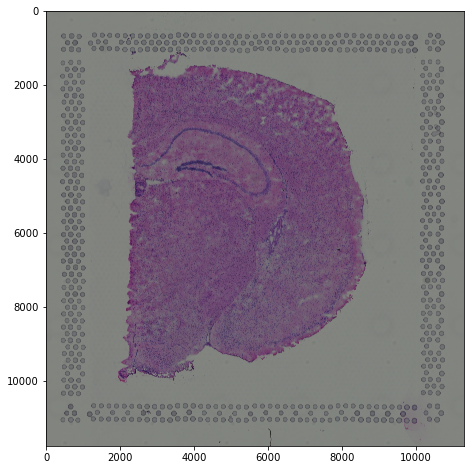

In [7]:
plt.imshow(img)